In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Step 1: Read the CSV file
df = pd.read_csv('LPGdesbutanizerStepTest.csv', delimiter=";", index_col=0)
df.columns = ['TBOTTOM', 'QREFLUX', 'C2LPG', 'C5LPG']
print(df)

              TBOTTOM  QREFLUX     C2LPG     C5LPG
Time Minutes                                      
0                 166    10648  0.013969  0.015270
1                 166    10648  0.013969  0.015270
2                 166    10648  0.013969  0.015270
3                 166    10648  0.013969  0.015270
4                 166    10648  0.013969  0.015270
...               ...      ...       ...       ...
975               166    10648  0.013969  0.015351
976               166    10648  0.013969  0.015351
977               166    10648  0.013969  0.015350
978               166    10648  0.013969  0.015350
979               166    10648  0.013969  0.015350

[980 rows x 4 columns]


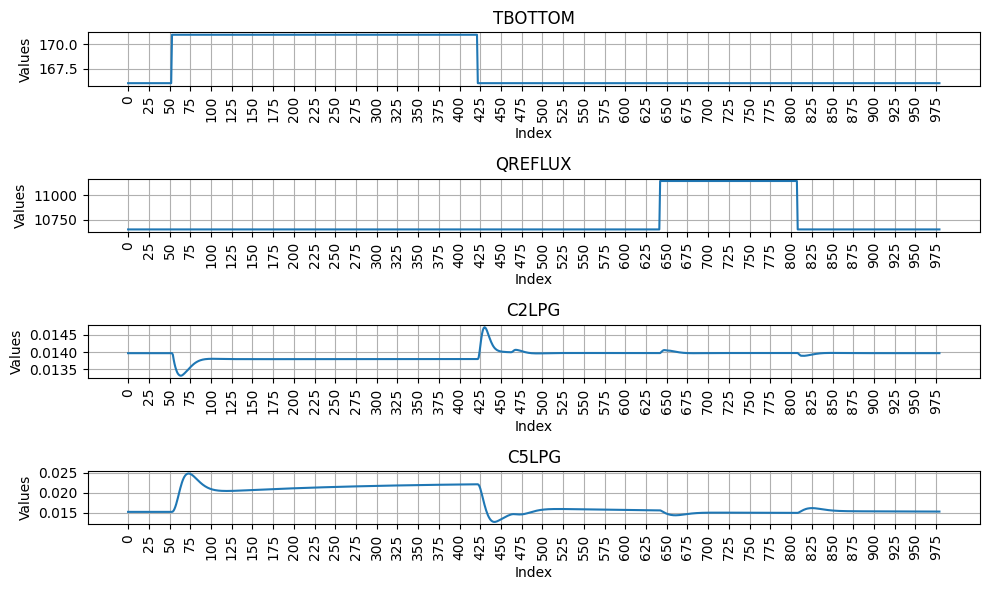

In [3]:
import matplotlib.pyplot as plt

# Number of columns to plot
num_columns = len(df.columns)

# Creating subplots
fig, axs = plt.subplots(num_columns, 1, figsize=(10, 6))  # Adjust figsize as needed

# Plotting each column on a separate subplot
for i, column in enumerate(df.columns):
    axs[i].plot(df.index, df[column])
    axs[i].set_title(column)
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Values')
    axs[i].set_xticks(range(0, len(df.index), 25))
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 90 degrees
    axs[i].grid(True)  # Add gridlines

plt.tight_layout()  # Adjust layout to not overlap subplots
plt.show()


In [4]:
NUM_U = 2
df_u = df.iloc[:, :NUM_U]
df_y = df.iloc[:, NUM_U:]

In [8]:
# Constant for response size
RESPONSE_SIZE = 75

# Initialize a list to store input and output responses
df_responses = []

# Iterate over the columns of df_u
for column in df_u.columns:
    # Initialize variables to store the step moment and previous u value
    step_moment = None
    prev_u = None

    # Iterate over the rows of df_u
    for index, row in df_u.iterrows():
        # If the previous u value is not None and the current u value is different from the previous one
        if prev_u is not None and row[column] != prev_u:
            step_moment = index  # Set the step moment to the current index
            break  # Break the loop as we found the step moment

        prev_u = row[column]  # Update the previous u value

    # Ensure that the step moment allows enough data for the response size
    if step_moment is not None and step_moment + RESPONSE_SIZE <= df_u.index[-1]:
        # Extract the output response (from the step moment to RESPONSE_SIZE rows after)
        step_responses = df_y.loc[step_moment:step_moment + RESPONSE_SIZE - 1]

        # Reset the index of the response DataFrame
        step_responses.reset_index(drop=True, inplace=True)

        # Rename the columns of the response DataFrame
        step_responses.columns = [f"{column} x {col}" for col in step_responses.columns]

        # Append the response DataFrame to the list of DataFrames
        df_responses.append(step_responses)

# Concatenate the list of DataFrames along the columns axis
df_responses = pd.concat(df_responses, axis=1)

# Loop through each column of df_responses
for col in df_responses.columns:
    # Subtract all values in the column by the first value
    df_responses[col] = df_responses[col] - df_responses[col].iloc[0]

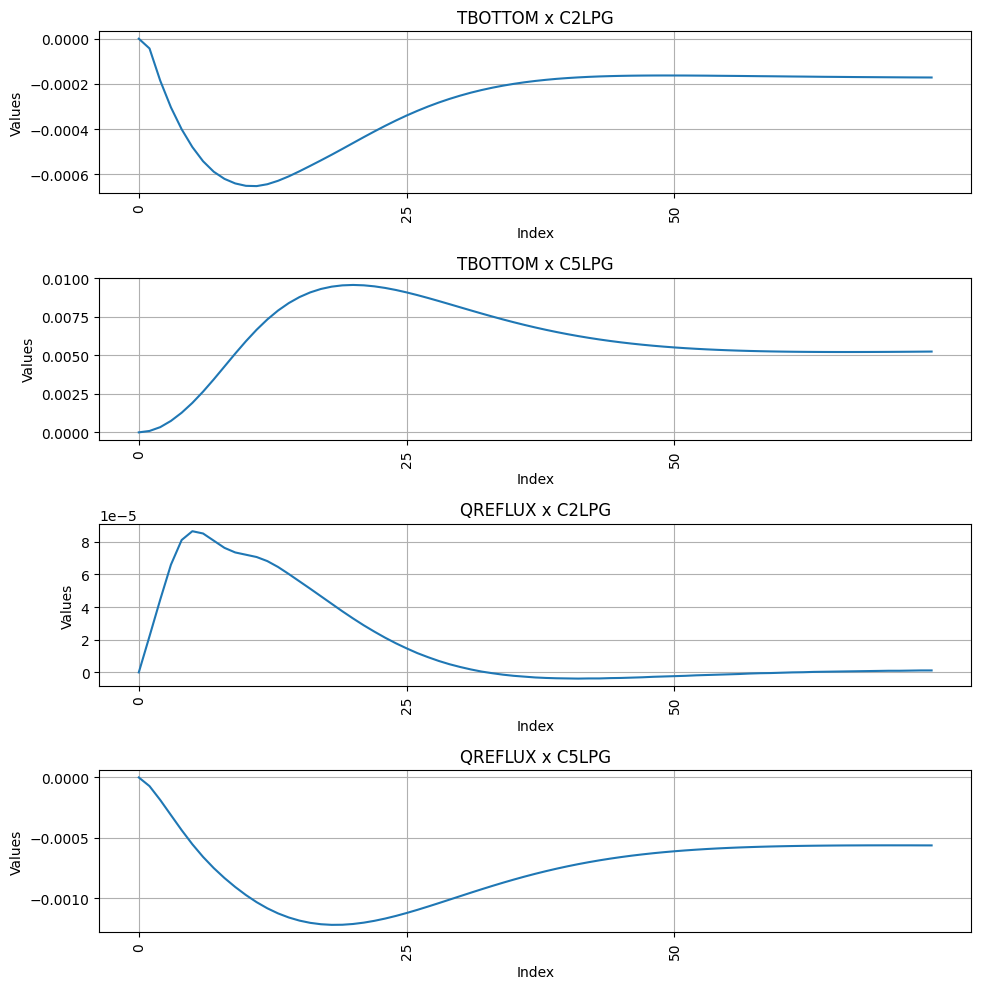

In [12]:
# Number of columns to plot
num_columns = len(df_responses.columns)

# Creating subplots
fig, axs = plt.subplots(num_columns, 1, figsize=(10, 10))  # Adjust figsize as needed

# Plotting each column on a separate subplot
for i, column in enumerate(df_responses.columns):
    axs[i].plot(step_responses.index, df_responses[column])
    axs[i].set_title(column)
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Values')
    axs[i].set_xticks(range(0, len(df_responses.index), 25))
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 90 degrees
    axs[i].grid(True)  # Add gridlines

plt.tight_layout()  # Adjust layout to not overlap subplots
plt.show()